#  Real Estate price predicter

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     503 non-null    float64
 1   ZN       503 non-null    float64
 2   INDUS    503 non-null    float64
 3   CHAS     503 non-null    int64  
 4   NOX      503 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      503 non-null    float64
 7   DIS      503 non-null    float64
 8   RAD      503 non-null    int64  
 9   TAX      503 non-null    int64  
 10  PTRATIO  503 non-null    float64
 11  B        503 non-null    float64
 12  LSTAT    503 non-null    float64
 13  MEDV     503 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.1 KB


In [5]:
housing['CHAS'].value_counts()

0    468
1     35
Name: CHAS, dtype: int64

In [6]:
housing['ZN'].value_counts()

0.0      369
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.633693,11.431412,11.168628,0.069583,0.555091,6.282930,68.577734,3.786880,9.588469,409.139165,18.451292,356.481292,12.689761,22.504970
std,8.623194,23.375438,6.865424,0.254695,0.116077,0.703484,28.218484,2.108693,8.718234,168.609418,2.168204,91.531641,7.143408,9.202357
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.884500,44.700000,2.094100,4.000000,279.500000,17.350000,375.270000,7.065000,16.900000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.100000,391.430000,11.410000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.622000,94.100000,5.164950,24.000000,666.000000,20.200000,396.235000,17.025000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

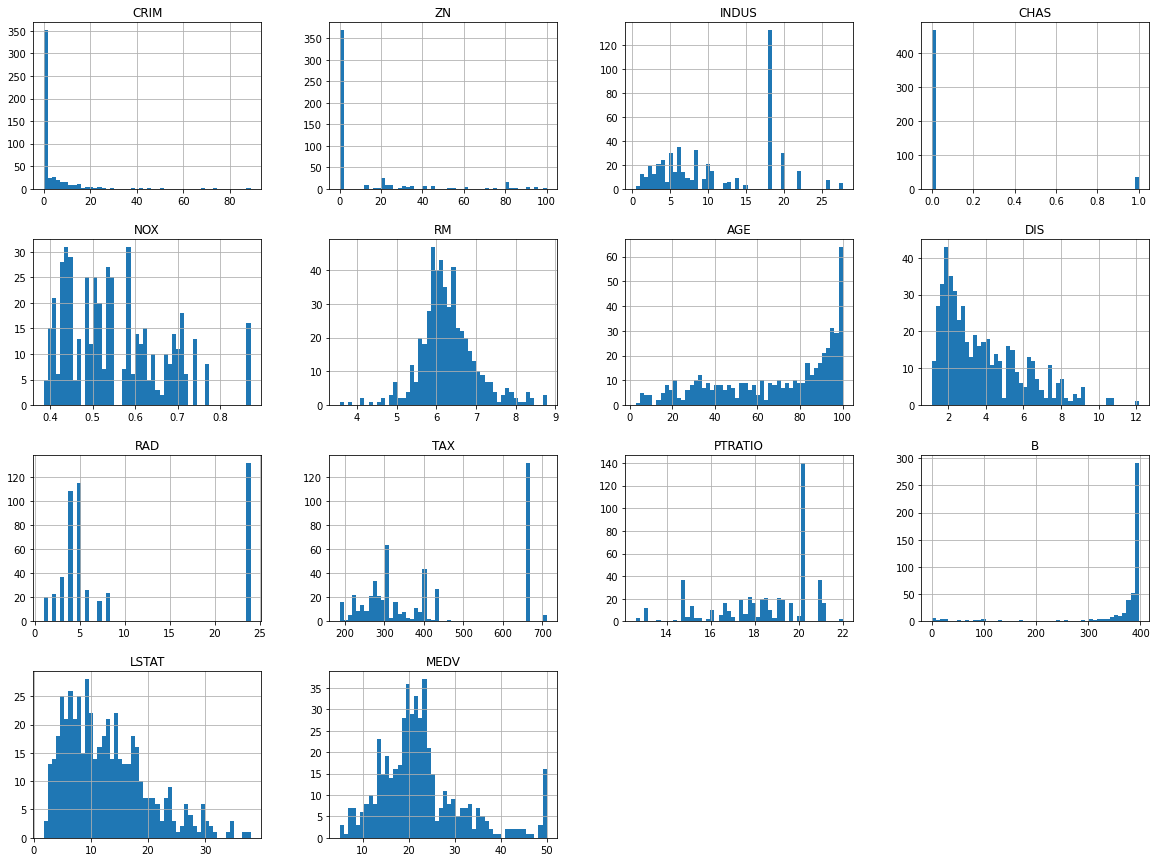

In [10]:
housing.hist(bins=50, figsize=(20,15))

# #  Train test spliting

In [11]:
#learning purpose
import numpy as np
def split_train_test(data ,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
#train_set , test_set = split_train_test(housing,0.2)

In [13]:
#print(f"Rows in train set : {len(train_set)}\nRows in test set :{len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set :{len(test_set)}\n")

Rows in train set : 402
Rows in test set :101



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set['CHAS'].value_counts()

0    374
1     28
Name: CHAS, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [18]:
housing = strat_train_set.copy()

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

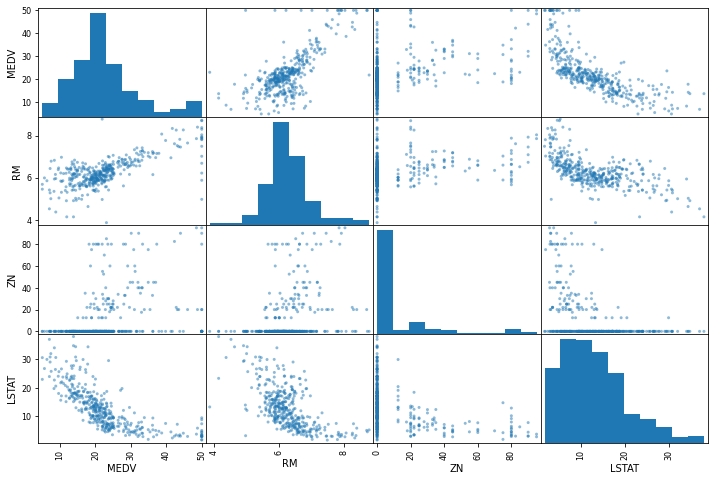

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8)) 

## Trying Attribute Combination

In [20]:
housing['TAXRM'] = housing['TAX']/housing["RM"]

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
15,0.80271,0.0,8.14,0,0.5380,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2,56.268328
96,0.06860,0.0,2.89,0,0.4450,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,37.216828
451,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9,98.989298
189,0.08664,45.0,3.44,0,0.4370,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4,55.447200
200,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5,28.524131


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695674
ZN         0.353578
B          0.340360
DIS        0.217712
CHAS       0.206585
AGE       -0.353645
RAD       -0.367577
CRIM      -0.374415
NOX       -0.409887
TAX       -0.447173
INDUS     -0.453581
PTRATIO   -0.493558
TAXRM     -0.523864
LSTAT     -0.732619
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

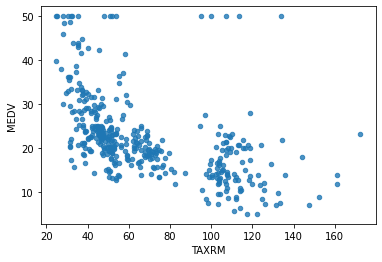

In [23]:
housing.plot(kind="scatter",x = "TAXRM",y = "MEDV", alpha=0.8)

In [24]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## In Case of Missing Attributes

In [25]:
# in case of missing attributes there is 3 ways to deal with it
# 1.  delet missing data points
# 2.  delet whole column
# 3.  set the value (mean , 0, median)

In [26]:
# for case 1
# a=dropna(subset=['RM']).shape
# a.shape

In [27]:
#for case 2
# housing.drop("RM",axis=1).shape

In [28]:
# for case 3
# median=housing["RM"].median()
# housing["RM"].fillna(median)

In [29]:
housing.describe() #before we start imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,3.642628,10.757463,11.327463,0.069652,0.557395,6.267846,68.594776,3.766026,9.699005,412.074627,18.513682,354.563856,12.890149
std,8.658953,22.404555,6.793997,0.254876,0.118128,0.700472,27.954984,2.098689,8.789103,168.249101,2.110332,92.782886,7.288334
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091182,0.000000,5.222500,0.000000,0.449000,5.877250,45.225000,2.091150,4.000000,284.000000,17.400000,374.597500,7.205000
50%,0.289575,0.000000,9.900000,0.000000,0.538000,6.189000,77.700000,3.207450,5.000000,334.000000,19.100000,391.305000,11.845000
75%,3.695990,12.500000,18.100000,0.000000,0.629250,6.592250,93.875000,5.117675,24.000000,666.000000,20.200000,396.172500,17.117500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.89575e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.18900e+00, 7.77000e+01, 3.20745e+00, 5.00000e+00, 3.34000e+02,
       1.91000e+01, 3.91305e+02, 1.18450e+01])

In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,3.642628,10.757463,11.327463,0.069652,0.557395,6.267846,68.594776,3.766026,9.699005,412.074627,18.513682,354.563856,12.890149
std,8.658953,22.404555,6.793997,0.254876,0.118128,0.700472,27.954984,2.098689,8.789103,168.249101,2.110332,92.782886,7.288334
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091182,0.000000,5.222500,0.000000,0.449000,5.877250,45.225000,2.091150,4.000000,284.000000,17.400000,374.597500,7.205000
50%,0.289575,0.000000,9.900000,0.000000,0.538000,6.189000,77.700000,3.207450,5.000000,334.000000,19.100000,391.305000,11.845000
75%,3.695990,12.500000,18.100000,0.000000,0.629250,6.592250,93.875000,5.117675,24.000000,666.000000,20.200000,396.172500,17.117500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn design

In [35]:
# 1. Estimator
# 2. transformer
# 3. predictor

## Creating a pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler()),
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(402, 13)

## Selecting a desired model for Real Estate company

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]

In [41]:
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([19.986, 33.999, 14.536, 36.069, 48.763])

In [44]:
list(some_labels)

[20.2, 33.2, 14.9, 36.4, 48.5]

## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse

1.2097520941718733

## Using better Evaluation with cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([3.2724183 , 2.59485089, 5.15891505, 2.62418273, 2.97835601,
       2.28045869, 6.61743898, 2.46572998, 2.899027  , 2.63461349])

In [49]:
def print_scores(scores):
    print("scores :",scores)
    print("mean :",scores.mean())
    print("standard daviation :",scores.std())

In [50]:
print_scores(rmse_scores)

scores : [3.2724183  2.59485089 5.15891505 2.62418273 2.97835601 2.28045869
 6.61743898 2.46572998 2.899027   2.63461349]
mean : 3.352599110799102
standard daviation : 1.3353078008918862


## Saving the Model

In [51]:
from joblib import dump, load
dump(model, 'Realstate.joblib')

['Realstate.joblib']

## Test model on test data

In [52]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_preparerd = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_preparerd)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [53]:
final_rmse

3.606505561667226

In [56]:
prepared_data

array([[-0.3283834 , -0.48074454, -0.46974328, -0.27361709, -0.16439335,
        -1.16044209, -1.14593679,  0.01453841, -0.64922514, -0.62529642,
         1.17963243, -0.70762584, -0.16487235],
       [-0.4132695 , -0.48074454, -1.24344714, -0.27361709, -0.95265662,
         1.64115715, -0.21829277, -0.12920632, -0.87706321, -0.80977663,
        -0.24371596,  0.45686119, -0.92044329],
       [ 0.67887167, -0.48074454,  0.99808348, -0.27361709,  1.31889775,
         0.65773864,  0.91350458, -0.60585872,  1.62915555,  1.51110342,
         0.80007286, -3.7541121 ,  0.79951093],
       [-0.41118351,  1.53027841, -1.16239245, -0.27361709, -1.02046422,
         1.30096295, -1.51484542,  1.29469194, -0.53530611, -0.08375775,
        -1.57217445,  0.38768908, -1.37653338],
       [-0.41714315,  3.76474835, -1.27439529, -0.27361709, -1.19761156,
         2.26579942, -1.26771246,  0.64500198, -0.64922514, -1.1192273 ,
        -1.80939918,  0.41240111, -1.24739944]])